In [1]:
from logistic import *

In [2]:
np.random.seed(123)

In [3]:
rparam = np.arange(0.5, 1.5001, 0.05)
rlin = np.arange(0.5, 1.5001, 0.005)
tparam = np.arange(0.0, 30.0001, 1)
tlin = np.arange(0.0, 30.0001, 0.01)

In [4]:
class L(Logistic):
    _law = law2

In [5]:
model = r"\mathcal{N}(\mu=1, \sigma=0.15) \mathbf{1}_{[0, 2]}"
#model = r"\mathrm{U}(0.5, 1.5)"

In [6]:
N = 300000

In [7]:
tlin1 = np.arange(0, 31, 1)
tlin2 = np.arange(0, 30.1, 0.2)

In [8]:
#tlin2[0] += 1e-4

In [9]:
df = L.sample(tlin1, size=N)

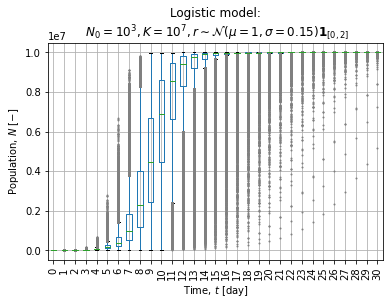

In [10]:
axe = df.boxplot(flierprops={"marker": ".", "markeredgecolor": "gray", "markersize": 2}, rot=90)
axe.set_title("Logistic model:\n $N_0=10^3, K=10^7, r\sim %s$" % model)
axe.set_xlabel(r"Time, $t$ $[\mathrm{day}]$")
_ = axe.set_ylabel(r"Population, $N$ $[-]$")

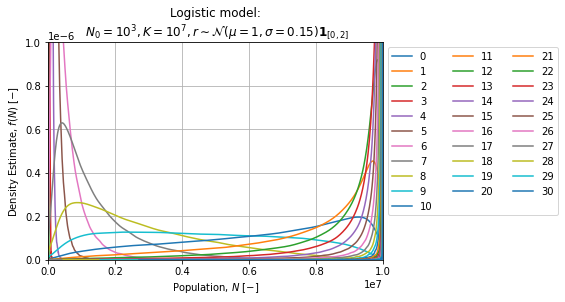

In [11]:
axe = df.iloc[:,::].plot(kind="kde")
axe.set_title("Logistic model:\n $N_0=10^3, K=10^7, r\sim %s$" % model)
axe.set_xlabel(r"Population, $N$ $[-]$")
axe.set_ylabel(r"Density Estimate, $f(N)$ $[-]$")
axe.set_xlim([0, 1e7])
axe.set_ylim([0, 1e-6])
axe.legend(bbox_to_anchor=(1, 1), loc="upper left", ncol=3)
axe.grid()

In [12]:
mu = L.mean(tlin2)

In [13]:
#mu

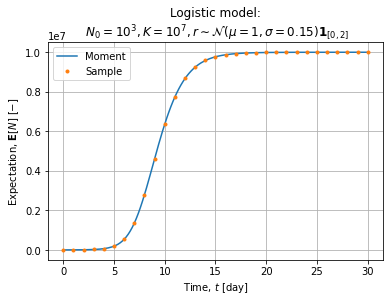

In [14]:
fig, axe = plt.subplots()
axe.plot(tlin2, mu[0], label="Moment")
df.mean().plot(marker='.', linestyle='none', ax=axe, label="Sample")
axe.set_title("Logistic model:\n $N_0=10^3, K=10^7, r\sim %s$" % model)
axe.set_xlabel(r"Time, $t$ $[\mathrm{day}]$")
axe.set_ylabel(r"Expectation, $\mathbf{E}[N]$ $[-]$")
axe.legend()
axe.grid()

In [15]:
var = L.variance(tlin2)

In [16]:
#var

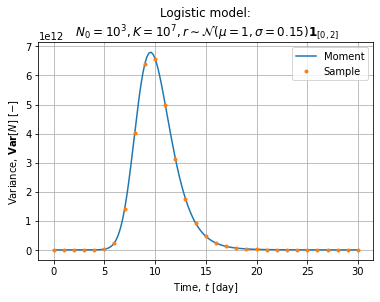

In [17]:
fig, axe = plt.subplots()
axe.plot(tlin2, var[0], label="Moment")
df.var().plot(marker='.', linestyle='none', ax=axe, label="Sample")
axe.set_title("Logistic model:\n $N_0=10^3, K=10^7, r\sim %s$" % model)
axe.set_xlabel(r"Time, $t$ $[\mathrm{day}]$")
axe.set_ylabel(r"Variance, $\mathbf{Var}[N]$ $[-]$")
axe.legend()
axe.grid()

In [18]:
skew = L.skewness(tlin2)

In [19]:
skew[0][0] = np.nan

In [20]:
#skew

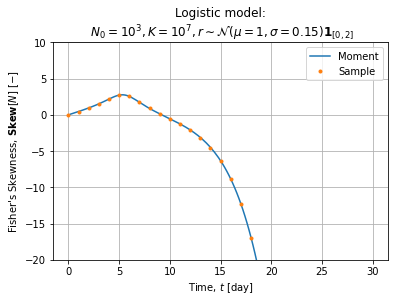

In [21]:
fig, axe = plt.subplots()
axe.plot(tlin2, skew[0], label="Moment")
df.skew().plot(marker='.', linestyle='none', ax=axe, label="Sample")
axe.set_title("Logistic model:\n $N_0=10^3, K=10^7, r\sim %s$" % model)
axe.set_xlabel(r"Time, $t$ $[\mathrm{day}]$")
axe.set_ylabel(r"Fisher's Skewness, $\mathbf{Skew}[N]$ $[-]$")
axe.set_ylim([-20, 10])
axe.legend()
axe.grid()

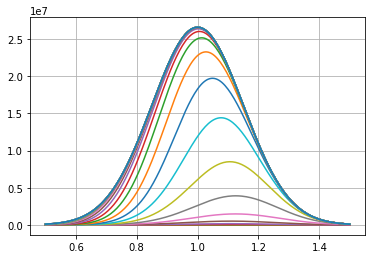

In [22]:
fig, axe = plt.subplots()
for t in tparam:
    axe.plot(rlin, L.moment_integrand(rlin, t, 1))
axe.grid()

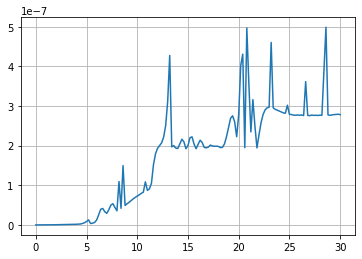

In [23]:
fig, axe = plt.subplots()
axe.plot(tlin2, mu[1])
axe.grid()

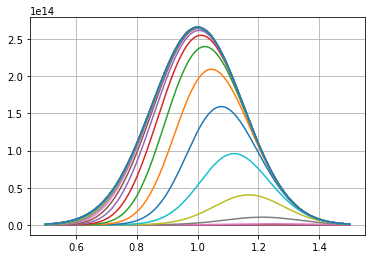

In [24]:
fig, axe = plt.subplots()
for t in tparam:
    axe.plot(rlin, L.moment_integrand(rlin, t, 2))
axe.grid()

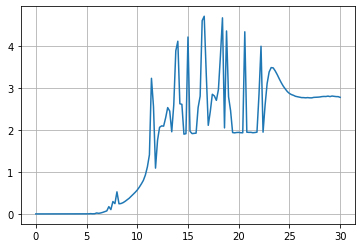

In [25]:
fig, axe = plt.subplots()
axe.plot(tlin2, var[1])
axe.grid()

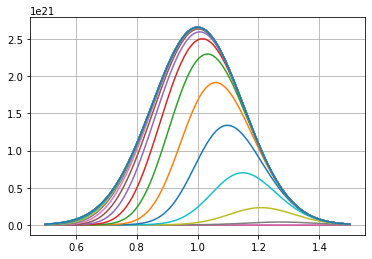

In [26]:
fig, axe = plt.subplots()
for t in tparam:
    axe.plot(rlin, L.moment_integrand(rlin, t, 3))
axe.grid()

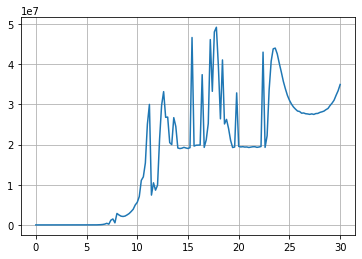

In [27]:
fig, axe = plt.subplots()
axe.plot(tlin2, skew[1])
axe.grid()